<a href="https://colab.research.google.com/github/LAworkspace/retail-recommender-MLOPS/blob/main/1_eda_preprocessing_newdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import polars as pl

events = pl.read_csv("/content/events.csv")
category_tree = pl.read_csv("/content/category_tree.csv")

# Define column names
columns_part1 = ["timestamp", "itemid", "property", "value"]
columns_part2 = ["timestamp", "itemid", "property"]  # only 3 columns in part2

# Read CSVs with correct headers
item_properties_part1 = pl.read_csv("/content/item_properties_part1.csv", has_header=False, new_columns=columns_part1)
item_properties_part2 = pl.read_csv("/content/item_properties_part2.csv", has_header=False, truncate_ragged_lines=True, new_columns=columns_part2)

# Add 'value' as a string "0"
item_properties_part2 = item_properties_part2.with_columns([
    pl.lit("0").alias("value")  # ensure it's a string
])

# Ensure column order matches
item_properties_part2 = item_properties_part2.select(columns_part1)

# Merge both
item_properties = pl.concat([item_properties_part1, item_properties_part2], how="vertical")

# ✅ Output check
print("✅ Combined item_properties shape:", item_properties.shape)
print(item_properties.head())


✅ Combined item_properties shape: (20275904, 4)
shape: (5, 4)
┌───────────────┬────────┬────────────┬─────────────────────────────────┐
│ timestamp     ┆ itemid ┆ property   ┆ value                           │
│ ---           ┆ ---    ┆ ---        ┆ ---                             │
│ str           ┆ str    ┆ str        ┆ str                             │
╞═══════════════╪════════╪════════════╪═════════════════════════════════╡
│ timestamp     ┆ itemid ┆ property   ┆ value                           │
│ 1435460400000 ┆ 460429 ┆ categoryid ┆ 1338                            │
│ 1441508400000 ┆ 206783 ┆ 888        ┆ 1116713 960601 n277.200         │
│ 1439089200000 ┆ 395014 ┆ 400        ┆ n552.000 639502 n720.000 42456… │
│ 1431226800000 ┆ 59481  ┆ 790        ┆ n15360.000                      │
└───────────────┴────────┴────────────┴─────────────────────────────────┘


In [3]:
print("Events DataFrame:")
print(events.head())

print("\nCategory Tree DataFrame:")
print(category_tree.head())

Events DataFrame:
shape: (5, 5)
┌───────────────┬───────────┬───────┬────────┬───────────────┐
│ timestamp     ┆ visitorid ┆ event ┆ itemid ┆ transactionid │
│ ---           ┆ ---       ┆ ---   ┆ ---    ┆ ---           │
│ i64           ┆ i64       ┆ str   ┆ i64    ┆ str           │
╞═══════════════╪═══════════╪═══════╪════════╪═══════════════╡
│ 1433221332117 ┆ 257597    ┆ view  ┆ 355908 ┆ null          │
│ 1433224214164 ┆ 992329    ┆ view  ┆ 248676 ┆ null          │
│ 1433221999827 ┆ 111016    ┆ view  ┆ 318965 ┆ null          │
│ 1433221955914 ┆ 483717    ┆ view  ┆ 253185 ┆ null          │
│ 1433221337106 ┆ 951259    ┆ view  ┆ 367447 ┆ null          │
└───────────────┴───────────┴───────┴────────┴───────────────┘

Category Tree DataFrame:
shape: (5, 2)
┌────────────┬──────────┐
│ categoryid ┆ parentid │
│ ---        ┆ ---      │
│ i64        ┆ i64      │
╞════════════╪══════════╡
│ 1016       ┆ 213      │
│ 809        ┆ 169      │
│ 570        ┆ 9        │
│ 1691       ┆ 885      │
│

In [4]:
print(events.schema, "\n")
print(category_tree.schema,  "\n")
print(item_properties.schema,  "\n")

Schema([('timestamp', Int64), ('visitorid', Int64), ('event', String), ('itemid', Int64), ('transactionid', String)]) 

Schema([('categoryid', Int64), ('parentid', Int64)]) 

Schema([('timestamp', String), ('itemid', String), ('property', String), ('value', String)]) 



In [5]:
print(events.null_count())
print(category_tree.null_count())
print(item_properties.null_count())

shape: (1, 5)
┌───────────┬───────────┬───────┬────────┬───────────────┐
│ timestamp ┆ visitorid ┆ event ┆ itemid ┆ transactionid │
│ ---       ┆ ---       ┆ ---   ┆ ---    ┆ ---           │
│ u32       ┆ u32       ┆ u32   ┆ u32    ┆ u32           │
╞═══════════╪═══════════╪═══════╪════════╪═══════════════╡
│ 0         ┆ 0         ┆ 0     ┆ 0      ┆ 2733644       │
└───────────┴───────────┴───────┴────────┴───────────────┘
shape: (1, 2)
┌────────────┬──────────┐
│ categoryid ┆ parentid │
│ ---        ┆ ---      │
│ u32        ┆ u32      │
╞════════════╪══════════╡
│ 0          ┆ 25       │
└────────────┴──────────┘
shape: (1, 4)
┌───────────┬────────┬──────────┬───────┐
│ timestamp ┆ itemid ┆ property ┆ value │
│ ---       ┆ ---    ┆ ---      ┆ ---   │
│ u32       ┆ u32    ┆ u32      ┆ u32   │
╞═══════════╪════════╪══════════╪═══════╡
│ 0         ┆ 0      ┆ 0        ┆ 0     │
└───────────┴────────┴──────────┴───────┘


In [6]:
events.describe()

statistic,timestamp,visitorid,event,itemid,transactionid
str,f64,f64,str,f64,str
"""count""",2.756101e6,2.756101e6,"""2756101""",2.756101e6,"""22457"""
"""null_count""",0.0,0.0,"""0""",0.0,"""2733644"""
"""mean""",1.4364e12,701922.883229,null,234922.478375,null
"""std""",3.3663e9,405687.520809,null,134195.425214,null
"""min""",1.4306e12,0.0,"""addtocart""",3.0,"""0"""
"""25%""",1.4335e12,350566.0,null,118120.0,null
"""50%""",1.4365e12,702060.0,null,236067.0,null
"""75%""",1.4392e12,1.053437e6,null,350715.0,null
"""max""",1.4425e12,1.407579e6,"""view""",466867.0,"""9999"""


In [7]:
item_properties.describe()

statistic,timestamp,itemid,property,value
str,str,str,str,str
"""count""","""20275904""","""20275904""","""20275904""","""20275904"""
"""null_count""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null
"""std""",null,null,null,null
"""min""","""1431226800000""","""0""","""0""","""0"""
"""25%""",null,null,null,null
"""50%""",null,null,null,null
"""75%""",null,null,null,null
"""max""","""timestamp""","""itemid""","""property""","""value"""


/tmp/ipython-input-8-1253706075.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=event_counts_df, x="event", y="count", palette="viridis")


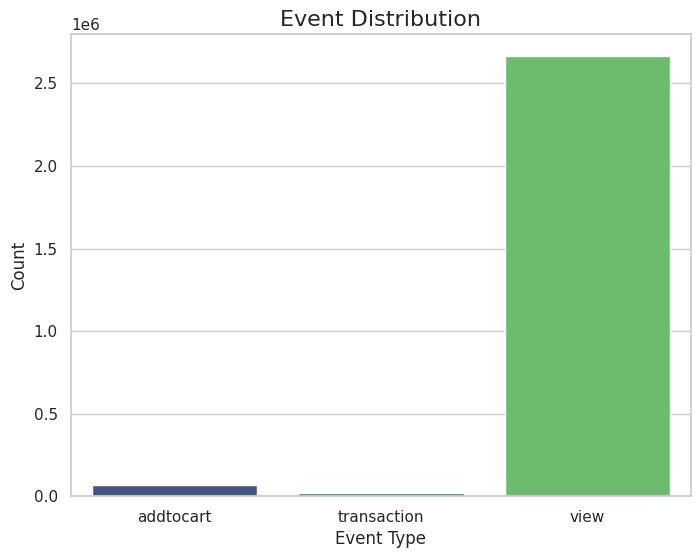

In [8]:
event_counts = events.group_by("event").agg(pl.count("event").alias("count"))

# Convert Polars DataFrame to Pandas DataFrame
event_counts_df = event_counts.to_pandas()

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=event_counts_df, x="event", y="count", palette="viridis")

# Add title and labels
plt.title("Event Distribution", fontsize=16)
plt.xlabel("Event Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()

In [9]:
total_views = events.filter(pl.col("event") == "view").shape[0]

# Step 2: Aggregate counts for all events
event_counts = (
    events.group_by("event")
    .agg(pl.count("event").alias("count"))
    .with_columns(
        # Step 3: Add percentage column
        (pl.col("count") / total_views * 100).alias("percent_of_purchases")
    )
)


print(event_counts)
print( np.round( event_counts["percent_of_purchases"], 2))

shape: (3, 3)
┌─────────────┬─────────┬──────────────────────┐
│ event       ┆ count   ┆ percent_of_purchases │
│ ---         ┆ ---     ┆ ---                  │
│ str         ┆ u32     ┆ f64                  │
╞═════════════╪═════════╪══════════════════════╡
│ view        ┆ 2664312 ┆ 100.0                │
│ transaction ┆ 22457   ┆ 0.842882             │
│ addtocart   ┆ 69332   ┆ 2.602248             │
└─────────────┴─────────┴──────────────────────┘
[100.     0.84   2.6 ]


In [10]:
print(events.columns)
print(events.head())


['timestamp', 'visitorid', 'event', 'itemid', 'transactionid']
shape: (5, 5)
┌───────────────┬───────────┬───────┬────────┬───────────────┐
│ timestamp     ┆ visitorid ┆ event ┆ itemid ┆ transactionid │
│ ---           ┆ ---       ┆ ---   ┆ ---    ┆ ---           │
│ i64           ┆ i64       ┆ str   ┆ i64    ┆ str           │
╞═══════════════╪═══════════╪═══════╪════════╪═══════════════╡
│ 1433221332117 ┆ 257597    ┆ view  ┆ 355908 ┆ null          │
│ 1433224214164 ┆ 992329    ┆ view  ┆ 248676 ┆ null          │
│ 1433221999827 ┆ 111016    ┆ view  ┆ 318965 ┆ null          │
│ 1433221955914 ┆ 483717    ┆ view  ┆ 253185 ┆ null          │
│ 1433221337106 ┆ 951259    ┆ view  ┆ 367447 ┆ null          │
└───────────────┴───────────┴───────┴────────┴───────────────┘


In [11]:
# Rename for clarity: transaction = purchase
purchase_events = events.filter(pl.col("event") == "transaction")
cart_events = events.filter(pl.col("event") == "addtocart")
view_events = events.filter(pl.col("event") == "view")

# Count of users who made purchases
unique_buyers = purchase_events.select("visitorid").n_unique()
print(f"🛍️ Unique buyers: {unique_buyers}")
print("🧾 Sample Purchase Events:")
print(purchase_events.head())


🛍️ Unique buyers: 11719
🧾 Sample Purchase Events:
shape: (5, 5)
┌───────────────┬───────────┬─────────────┬────────┬───────────────┐
│ timestamp     ┆ visitorid ┆ event       ┆ itemid ┆ transactionid │
│ ---           ┆ ---       ┆ ---         ┆ ---    ┆ ---           │
│ i64           ┆ i64       ┆ str         ┆ i64    ┆ str           │
╞═══════════════╪═══════════╪═════════════╪════════╪═══════════════╡
│ 1433222276276 ┆ 599528    ┆ transaction ┆ 356475 ┆ 4000          │
│ 1433193500981 ┆ 121688    ┆ transaction ┆ 15335  ┆ 11117         │
│ 1433193915008 ┆ 552148    ┆ transaction ┆ 81345  ┆ 5444          │
│ 1433176736375 ┆ 102019    ┆ transaction ┆ 150318 ┆ 13556         │
│ 1433174518180 ┆ 189384    ┆ transaction ┆ 310791 ┆ 7244          │
└───────────────┴───────────┴─────────────┴────────┴───────────────┘


In [12]:
# Use `.len()` instead of `.count()` in Polars
purchases_per_user = purchase_events.group_by("visitorid").len().sort("len", descending=True)

print("📊 Top 10 users by purchase count:")
print(purchases_per_user.head(10))




📊 Top 10 users by purchase count:
shape: (10, 2)
┌───────────┬─────┐
│ visitorid ┆ len │
│ ---       ┆ --- │
│ i64       ┆ u32 │
╞═══════════╪═════╡
│ 1150086   ┆ 559 │
│ 152963    ┆ 349 │
│ 530559    ┆ 286 │
│ 684514    ┆ 189 │
│ 861299    ┆ 188 │
│ 76757     ┆ 185 │
│ 138131    ┆ 173 │
│ 890980    ┆ 145 │
│ 1297062   ┆ 136 │
│ 247235    ┆ 132 │
└───────────┴─────┘


In [13]:
# View events
views_per_user = view_events.group_by("visitorid").len().rename({"len": "views"})

# Cart events
carts_per_user = cart_events.group_by("visitorid").len().rename({"len": "carts"})

# Purchase events
purchases_per_user = purchase_events.group_by("visitorid").len().rename({"len": "purchases"})

# Join all three into a user activity dataset
# Updated joins using `how='full'` and clean up duplicate visitorid columns
user_activity = views_per_user.join(carts_per_user, on="visitorid", how="full") \
                              .join(purchases_per_user, on="visitorid", how="full") \
                              .fill_null(0)

# Ensure only one 'visitorid' column remains (drop any `_right`)
user_activity = user_activity.select([
    pl.col("visitorid"),
    pl.col("views"),
    pl.col("carts"),
    pl.col("purchases")
])

print("🧠 Cleaned User Activity Profile:")
print(user_activity.head())



🧠 Cleaned User Activity Profile:
shape: (5, 4)
┌───────────┬───────┬───────┬───────────┐
│ visitorid ┆ views ┆ carts ┆ purchases │
│ ---       ┆ ---   ┆ ---   ┆ ---       │
│ i64       ┆ u32   ┆ u32   ┆ u32       │
╞═══════════╪═══════╪═══════╪═══════════╡
│ 753608    ┆ 1     ┆ 0     ┆ 0         │
│ 1088026   ┆ 3     ┆ 0     ┆ 0         │
│ 622168    ┆ 1     ┆ 0     ┆ 0         │
│ 360580    ┆ 1     ┆ 0     ┆ 0         │
│ 216741    ┆ 1     ┆ 0     ┆ 0         │
└───────────┴───────┴───────┴───────────┘


In [14]:
user_activity = user_activity.with_columns([
    (pl.col("carts") / pl.col("views")).alias("view_to_cart_rate"),
    (pl.col("purchases") / pl.col("carts")).alias("cart_to_purchase_rate"),
    (pl.col("purchases") / pl.col("views")).alias("view_to_purchase_rate")
])


In [15]:
print("📈 User Conversion Rate Preview:")
print(user_activity.head(10))


📈 User Conversion Rate Preview:
shape: (10, 7)
┌───────────┬───────┬───────┬───────────┬───────────────────┬───────────────────┬──────────────────┐
│ visitorid ┆ views ┆ carts ┆ purchases ┆ view_to_cart_rate ┆ cart_to_purchase_ ┆ view_to_purchase │
│ ---       ┆ ---   ┆ ---   ┆ ---       ┆ ---               ┆ rate              ┆ _rate            │
│ i64       ┆ u32   ┆ u32   ┆ u32       ┆ f64               ┆ ---               ┆ ---              │
│           ┆       ┆       ┆           ┆                   ┆ f64               ┆ f64              │
╞═══════════╪═══════╪═══════╪═══════════╪═══════════════════╪═══════════════════╪══════════════════╡
│ 753608    ┆ 1     ┆ 0     ┆ 0         ┆ 0.0               ┆ NaN               ┆ 0.0              │
│ 1088026   ┆ 3     ┆ 0     ┆ 0         ┆ 0.0               ┆ NaN               ┆ 0.0              │
│ 622168    ┆ 1     ┆ 0     ┆ 0         ┆ 0.0               ┆ NaN               ┆ 0.0              │
│ 360580    ┆ 1     ┆ 0     ┆ 0         ┆ 0.

In [16]:
average_rates = user_activity.select([
    pl.mean("view_to_cart_rate").alias("avg_view_to_cart"),
    pl.mean("cart_to_purchase_rate").alias("avg_cart_to_purchase"),
    pl.mean("view_to_purchase_rate").alias("avg_view_to_purchase")
])
print("📊 Average Conversion Rates:")
print(average_rates)


📊 Average Conversion Rates:
shape: (1, 3)
┌──────────────────┬──────────────────────┬──────────────────────┐
│ avg_view_to_cart ┆ avg_cart_to_purchase ┆ avg_view_to_purchase │
│ ---              ┆ ---                  ┆ ---                  │
│ f64              ┆ f64                  ┆ f64                  │
╞══════════════════╪══════════════════════╪══════════════════════╡
│ NaN              ┆ NaN                  ┆ NaN                  │
└──────────────────┴──────────────────────┴──────────────────────┘


# BUILDING DATASET FOR MODEL TRAINING


In [17]:
# Step 1: Group and rename counts properly
views_per_user = view_events.group_by("visitorid").len().rename({"len": "views"})
carts_per_user = cart_events.group_by("visitorid").len().rename({"len": "carts"})
purchases_per_user = purchase_events.group_by("visitorid").len().rename({"len": "purchases"})



In [18]:
user_activity = views_per_user.join(carts_per_user, on="visitorid", how="full") \
                              .join(purchases_per_user, on="visitorid", how="full") \
                              .fill_null(0)


In [19]:
user_activity = user_activity.with_columns([
    (pl.col("carts") / pl.col("views")).alias("view_to_cart_rate"),
    (pl.col("purchases") / pl.col("carts")).alias("cart_to_purchase_rate"),
    (pl.col("purchases") / pl.col("views")).alias("view_to_purchase_rate")
])


In [20]:
# Fill NaN conversion rates with -1 to indicate missing funnel stage
user_activity = user_activity.with_columns([
    pl.when(pl.col("carts") == 0).then(-1).otherwise(pl.col("view_to_cart_rate")).alias("view_to_cart_rate"),
    pl.when(pl.col("purchases") == 0).then(-1).otherwise(pl.col("cart_to_purchase_rate")).alias("cart_to_purchase_rate"),
    pl.when(pl.col("purchases") == 0).then(-1).otherwise(pl.col("view_to_purchase_rate")).alias("view_to_purchase_rate")
])


In [21]:
user_labeled = user_activity.with_columns([
    (
        ((pl.col("view_to_cart_rate") >= 0) & (pl.col("view_to_cart_rate") < 0.2)) |
        ((pl.col("cart_to_purchase_rate") >= 0) & (pl.col("cart_to_purchase_rate") < 0.3))
    ).cast(pl.Int8).alias("low_conversion_label")
])


In [22]:
print(user_labeled.head())

shape: (5, 10)
┌───────────┬───────┬─────────────┬───────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ visitorid ┆ views ┆ visitorid_r ┆ carts ┆ … ┆ view_to_car ┆ cart_to_pu ┆ view_to_pu ┆ low_conver │
│ ---       ┆ ---   ┆ ight        ┆ ---   ┆   ┆ t_rate      ┆ rchase_rat ┆ rchase_rat ┆ sion_label │
│ i64       ┆ u32   ┆ ---         ┆ u32   ┆   ┆ ---         ┆ e          ┆ e          ┆ ---        │
│           ┆       ┆ i64         ┆       ┆   ┆ f64         ┆ ---        ┆ ---        ┆ i8         │
│           ┆       ┆             ┆       ┆   ┆             ┆ f64        ┆ f64        ┆            │
╞═══════════╪═══════╪═════════════╪═══════╪═══╪═════════════╪════════════╪════════════╪════════════╡
│ 309130    ┆ 3     ┆ 0           ┆ 0     ┆ … ┆ -1.0        ┆ -1.0       ┆ -1.0       ┆ 0          │
│ 284313    ┆ 2     ┆ 0           ┆ 0     ┆ … ┆ -1.0        ┆ -1.0       ┆ -1.0       ┆ 0          │
│ 894047    ┆ 1     ┆ 0           ┆ 0     ┆ … ┆ -1.0        ┆ -1.0       ┆ -

In [23]:
user_labeled.write_csv("/content/user_behavior_ml_dataset.csv")


In [25]:
# Step 1: Filter item_properties where property == "category"
category_props = item_properties.filter(pl.col("property") == "category")

# Step 2: Cast value to int and fix itemid type
category_props = category_props.with_columns([
    pl.col("itemid").cast(pl.Int64, strict=False),
    pl.col("value").cast(pl.Int64, strict=False).alias("categoryid")
])

# Step 3: Join view_events with category_props to get category ID
views_with_category_id = view_events.join(
    category_props.select(["itemid", "categoryid"]), on="itemid", how="inner"
)

# Step 4: Optional – join with category_tree to get category name
views_with_category = views_with_category_id.join(category_tree, on="categoryid", how="left")


In [26]:
most_viewed_category = views_with_category.group_by(["visitorid", "categoryid"]).len() \
    .sort("len", descending=True).group_by("visitorid").first() \
    .select(["visitorid", "categoryid"]) \
    .rename({"categoryid": "most_viewed_category"})


In [27]:
# ✅ Unique items viewed per user
unique_items_viewed = view_events.group_by("visitorid").agg([
    pl.col("itemid").n_unique().alias("unique_items_viewed")
])

# ✅ Unique items purchased per user
unique_items_purchased = purchase_events.group_by("visitorid").agg([
    pl.col("itemid").n_unique().alias("unique_items_purchased")
])


In [28]:
user_enriched = user_labeled \
    .join(unique_items_viewed, on="visitorid", how="left") \
    .join(unique_items_purchased, on="visitorid", how="left") \
    .join(most_viewed_category, on="visitorid", how="left") \
    .fill_null(0)


In [29]:
user_enriched.write_csv("/content/user_behavior_enriched_ml_dataset.csv")
